## <center><font color=navy>Big Data Economics</font></center>
### <center>Elastic Net Regularization</center>
#### <center>Ali Habibnia</center>
    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

<div class="alert alert-block alert-info">

> Elastic net (similar to ridge and lasso) is a penalty mechanism which applies shrinkage (driving them closer to zero) of coefficient to build a more robust and parsimonious model. This add regularization terms in the model which are combination of both L1 and L2 norm. 

<img src="images/elastic1.png"  width="600">


- Ridge regression; Hoerl and Kennard (1970)
- Lasso; Tibshirani (1996)
- Least Angle Regression (LARS); Efron, Hastie, Johnstone and Tibshirani (2004)
- Elastic net; Zou and Hastie (2004)
</div>




### Readings:

1. ***Chapter 3.4,*** [The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf). 
2. [Regularization and Variable Selection via the Elastic Net](https://web.stanford.edu/~hastie/TALKS/enet_talk.pdf)

### Goals

A regularization technique helps in the following main ways:

1. Doesn’t assume any particular distribution of the dependent variable 
2. Address Variance-Bias Tradeoffs. Generally will lower the variance from the model
3. More robust to handle multicollinearity
4. Better sparse data (observations < features) handling
5. Natural feature selection
6. More accurate prediction on new data as it minimizes overfitting on the train data
7. Easier interpretation of the output

And so on


> In mathematics, **sparse** and **dense** often refer to the number of zero vs. non-zero elements in an array (e.g. vector or matrix). A sparse array is one that contains mostly zeros and few non-zero entries, and a dense array contains mostly non-zeros.

> LASSO and Ridge encourage sparse and dense model, respectively, but since it never be that clear how the true model looks like, it’s typical to apply both methods and determine the best model.

<img src="images/l1l2_1.png"  width="400">
<img src="images/l1l2_2.png"  width="400">

### Elastic Net (L1 + L2)

- The elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods.

- Elastic net penalizes large coeficients by linearly combines the squared magnitude and absolute value of magnitude to the cost function. 

- This combination allows for learning a sparse model where few of the coeficients are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the a ratio parameter $\alpha$.

This can be mathematically represented as

<br>
<center>  $L_{elastic\_net}(\hat\beta) = \sum_{I=1}^n(y_i-x_i’\hat\beta)^2 + \lambda_2 \sum_{j=1}^p\hat\beta_j^2 + \lambda_1 \sum_{j=1}^p|\hat\beta_j| $   </center>

Or we can also represent the objective function for elastic net based on a ratio parametre $\alpha$

<br>
<img src="images/elasticbeta.png"  width="400">

In addition to setting and choosing a lambda value elastic net also allows us to tune the alpha parameter where 𝞪 = 0 corresponds to ridge and 𝞪 = 1 to lasso. Simply put, if you plug in 0 for alpha, the penalty function reduces to the L1 (ridge) term and if we set alpha to 1 we get the L2 (lasso) term. Therefore we can choose an alpha value between 0 and 1 to optimize the elastic net. Effectively this will shrink some coefficients and set some to 0 for sparse selection.

To get a visual understanding we can look at the geometry of the two models

<img src="images/elastic2.png"  width="600">

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

### Example: Elastic net on Boston Housing Dataset

Let's see how Elastic net regularization works with the Housing dataset.


In [1]:
# dataframe and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# dataset
from sklearn.datasets import load_boston
# scaling and dataset split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# OLS, Ridge, LASSO, Elastic Net
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# load dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
# Define Models

lm = LinearRegression()
lm_lasso = Lasso()
lm_ridge = Ridge()
lm_elastic = ElasticNet()

print(lm)
print(lm_lasso)
print(lm_ridge)
print(lm_elastic)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [30]:
# Fit Models (on train data)

lm.fit(X_train, y_train)
lm_lasso.fit(X_train, y_train)
lm_ridge.fit(X_train, y_train)
lm_elastic.fit(X_train, y_train)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

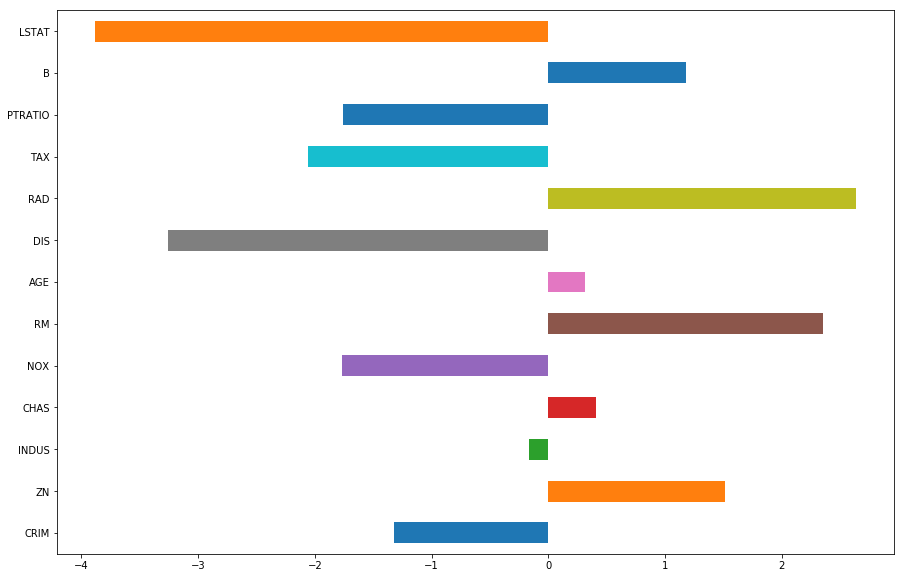

In [31]:
# Coeficients of the linear regression

plt.figure(figsize=(15,10))
ft_importance_lm = pd.Series(lm.coef_, index = house_price.feature_names)
ft_importance_lm.plot(kind='barh')
plt.show();

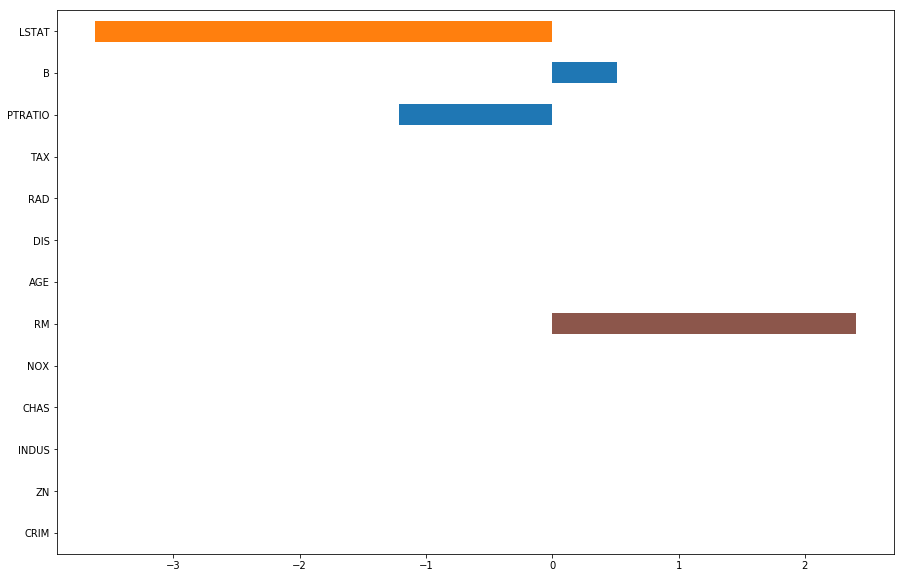

In [32]:
# Coeficients of lasso

plt.figure(figsize=(15,10))
ft_importance_lm_lasso = pd.Series(lm_lasso.coef_, index = house_price.feature_names)
ft_importance_lm_lasso.plot(kind='barh')
plt.show();

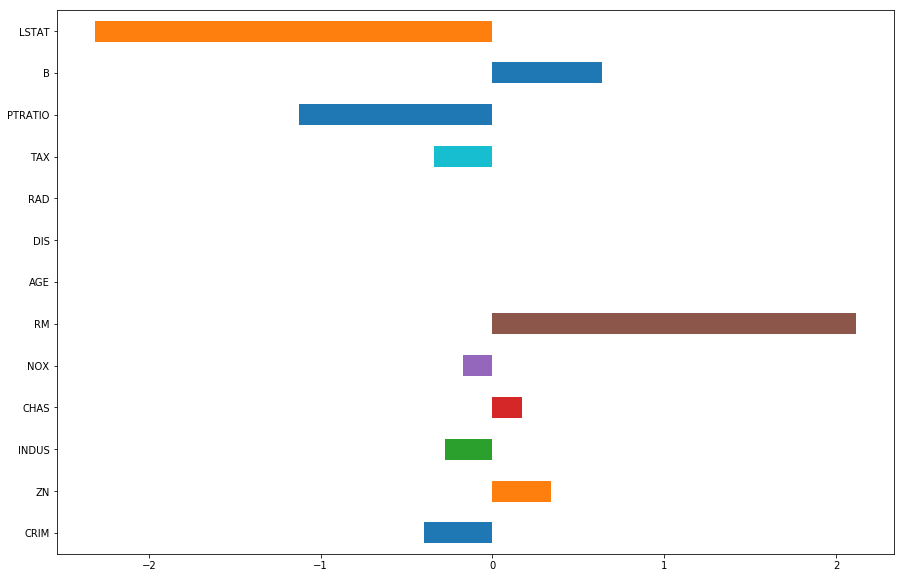

In [33]:
# Coeficients of Elastic net

plt.figure(figsize=(15,10))
ft_importance_lm_elastic = pd.Series(lm_elastic.coef_, index = house_price.feature_names)
ft_importance_lm_elastic.plot(kind='barh')
plt.show();